In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# number of users
N = 100

# simulate a small world network 
network = nx.watts_strogatz_graph(n = N, k = 4, p = 0.5)

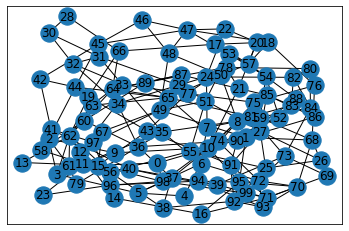

In [3]:
nx.draw_networkx(network)

In [4]:
# adjacency matrix (matrix with zeros and ones that encodes friendships)
adjacency = nx.to_numpy_array(network)

In [5]:
# degree of the each user
degree = np.sum(adjacency, axis=0)

In [6]:
# number of time steps 
T = 50

# models parameters
alpha = 0.1
beta = 0.5
gamma = 0.8

# simulate agent-based Bass model
X = np.zeros([N, T+1])
Y = np.zeros(T+1)

# forwards in time
for t in range(T):
    # looping over each agent/individual
    for n in range(N):
        if X[n, t] == 1:
            X[n, t+1] = 1
        else:
            # neighbours of agent n
            neighbours = adjacency[n, :] == 1
            aware_neighbours = np.sum(X[neighbours, t])
            
            # probability of agent n being aware
            probability = alpha + beta * aware_neighbours / N 
            
            # simulate the next state of agent n
            X[n, t+1] = np.random.binomial(1, probability)
    
    # observations aggregated over the population
    aware_users = np.sum(X[:,t+1])
    Y[t+1] = np.random.binomial(aware_users, gamma)
       

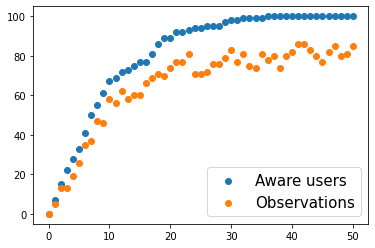

In [7]:
# number of aware users over time
aware_users = np.sum(X, axis = 0)
time = np.arange(0, T+1)
plt.scatter(time, aware_users)
plt.scatter(time, Y)
plt.legend(["Aware users", "Observations"], fontsize = 15)

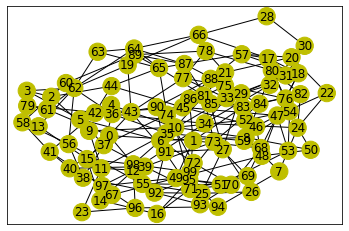

In [11]:
# visualize how information spreads over the network
t = 40
colors = N * [None]
for n in range(N):
    if X[n, t] == 1:
        colors[n] = "y"
    else:
        colors[n] = "w"
        
nx.draw_networkx(network, node_color = colors)